<a href="https://colab.research.google.com/github/zaeyonz/Fish_distribution/blob/main/Fish_distribution(Linear_Regression).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Data 준비***

In [ ]:
import numpy as np

perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

# ***traing set와 test set로 data 나누기***

* 특성 데이터는 2차원 배열로 변환


In [ ]:
from sklearn.model_selection import train_test_split

#train set 와 test set 나누기
train_input, test_input ,train_target, test_target = train_test_split(perch_length, perch_weight, random_state=42)

#train set와 test set를 2차원 배열로 변경
train_input = train_input.reshape(-1,1)
test_input = test_input.reshape(-1,1)

# ***Model training***

*   Using KNeighborsRegressor()
*   최근접 이웃 개수 3 설정

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor(n_neighbors=3)

knr.fit(train_input, train_target)

#길이가 50cm인 농어의 무게를 예측
print(knr.predict([[50]]))

[1033.33333333]


모델은 50cm의 농어의 무게를 1033g 정도로 예측했음

하지만 실제 이 농어의 무게는 훨씬 더 많이 나감 ----> 모델의 예측이 틀림!

# ***문제 확인***

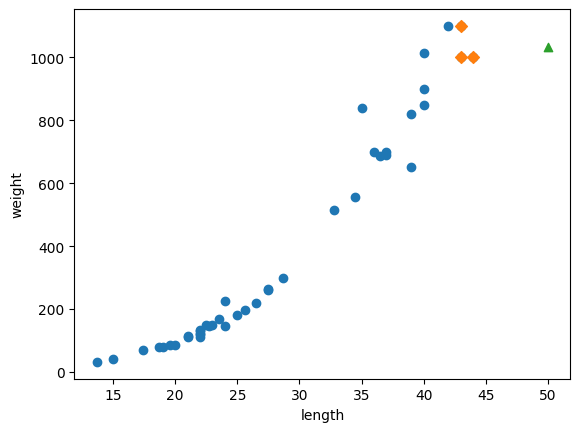

In [ ]:
#훈련세트와 50cm 농어 그리고 이 농어의 최근접 이웃을 산점도에 표시

import matplotlib.pyplot as plt

distance, indexes = knr.kneighbors([[50]])                                      #50cm 농어의 최근접 이웃 3개와의 거리와 그 샘플들의 인덱스를 구함

plt.scatter(train_input, train_target)                                          #train set의 산점도
plt.scatter(train_input[indexes], train_target[indexes], marker='D')            #train set에서의 최근접 이웃 샘플을 마름모로 표시

plt.scatter(50, 1033, marker='^')                                               #50cm 농어의 데이터
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

*   길이가 커질수록 농어의 무게가 증가하는 경향을 보임
*   하지만 50cm 농어에서 가장 가까운 것은 45cm 근방이기 때문에 k-최근접 이웃 알고리즘은 이 샘플들의 무게를 평균함
* ***따라서 이 모델은 최대 45cm를 넘어가는 데이터를 입력 받으면 항상 1033g으로 예측 할 수 밖에 없음***
---

In [ ]:
# 이웃 샘플들의 타깃의 평균
print(np.mean(train_target[indexes]))
print('         ')


# 길이가 100cm인 농어도 1033g으로 예측할 것임 ---> 틀림!
print(knr.predict([[100]]))

1033.3333333333333
         
[1033.33333333]


# ***선형 회귀(Linear Regression)***
---
*   특성이 하나인 경우 어떤 직선을 학습하는 알고리즘
*   사이킷런은 *sklearn.linear_model 패키지 아래에 LinearRegression 클래스*로 알고리즘을 구현하였음


In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

lr.fit(train_input, train_target)               # 모델 훈련

print(lr.predict([[50]]))          # 50cm 농어 무게 예측

[1241.83860323]


*   LinearRegression 클래스에는 coef_ 와 intercept_ 속성이 저장 되어 있음
*   coef_는 계수(coefficient) 또는 가중치(weight)라고 부름

In [ ]:
print(lr.coef_, lr.intercept_)

[39.01714496] -709.0186449535477


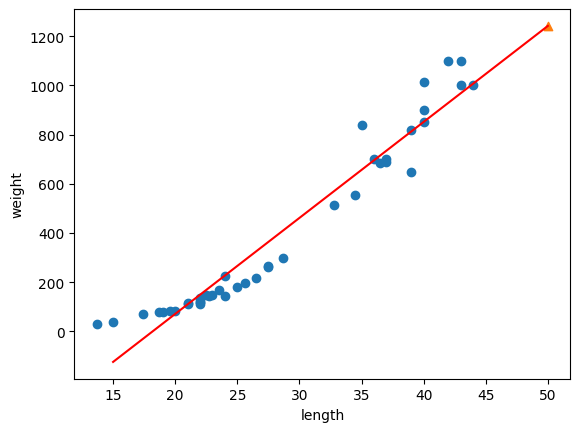

In [ ]:
plt.scatter(train_input, train_target)


#15에서 50까지 1차 방정식 그래프를 그림
plt.plot([15, 50], [15*lr.coef_+lr.intercept_, 50*lr.coef_+lr.intercept_], color='red'  )

#50cm 농어 데이터
plt.scatter(50, lr.predict([[50]]), marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()


*   위 빨간 직선은 선형 회귀 알고리즘이 이 데이터셋에서 찾은 최적의 직선임
*   길이가 50cm인 농어에 대한 예측( lr.predict([[50]]) 은 위 직선의 연장선에 있음
----

In [ ]:
# 각각의 세트의 R²점수
print(lr.score(train_input, train_target))      # train set의 R²점수
print(lr.score(test_input, test_target))        #test set의 R²점수

0.939846333997604
0.8247503123313558


---
*   train set 와 test set의 점수가 조금 차이 남
*   과대적합?? **NO**  Why?  훈련세트의 점수도 높은 편이 아님
*   오히려 전체적으로 과소적합이라 할 수 있음
*   또한 그래프의 왼쪽 아래 부분은 예측과 벗어남 ---> 회귀 방정식이 2차 방정식의 꼴을 가짐을 알 수 있음
---

# ***다항 회귀***
*   0이하의 값을 가지는 실제 값(무게, 길이 등)은 불가능 하므로 다항 회귀방정식의 꼴을 가지게 됨
*   2차 방정식의 그래프를 그리려면 샘플을 제곱한 항이 train set에 추가되어야 함

In [ ]:
#numpy 사용

train_poly = np.column_stack((train_input ** 2,train_input))
test_poly = np.column_stack((test_input ** 2, test_input))

In [ ]:
# 새롭게 만든 데이터셋의 크기 확인
print(train_poly.shape, test_poly.shape)

(42, 2) (14, 2)


# ***Model training (new data set)***

In [ ]:
lr = LinearRegression()
lr.fit(train_poly, train_target)

print(lr.predict([[50**2, 50]]))

[1573.98423528]


In [ ]:
print(lr.coef_, lr.intercept_)

[  1.01433211 -21.55792498] 116.0502107827827


# 다항식
***무게 = 1.01   *    길이² -    21.6     *   길이  + 116.05***

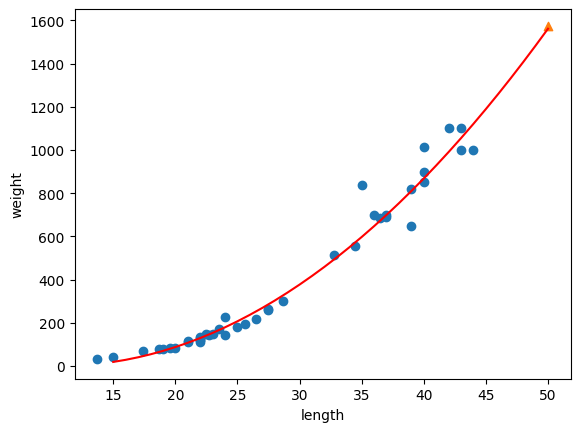

In [ ]:
#구간별 직선을 그리기 위해 15에서 50까지 정수 배열 생성
point = np.arange(15,51)


#train set의 산점도
plt.scatter(train_input, train_target)


# 15에서 50까지 2차 방정식 그래프
plt.plot(point,1.01*point**2 - 21.6*point + 116.05, color = 'red')

# 50cm 농어 데이터
plt.scatter(50, 1574, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [ ]:
print(lr.score(train_poly,train_target))
print(lr.score(test_poly, test_target))

0.9706807451768623
0.9775935108325122


*   train set와 test set에 대한 점수가 크게 높아짐
*   여전히 test set의 점수가 조금 더 높음 ---> 과소적합이 남아 있음 ---> 더 복잡한 모델이 필요!!!!